# Optimization Process

### Load cases, run once at each load case

It is suggested to run once with a specific load case you want to design and then just re run multiple times the cell below this one (the one where you change the thicknesses)

In [12]:
from variables import *
from wp4_2 import WingBox

"""
xflr_files = 'XFLRdata\\XFLR5sims'

# change these
aircraft_mass = 35688
alt_sound_speed = 296.56

internal_forces = InternalForces(aircraft_mass=aircraft_mass, load_factor= load_factor, sound_speed=alt_sound_speed, half_chord_sweep= hchord_sweep, fus_radius=fus_radius, density=rho0, airspeed= airspeed, 
                                 c_r= c_r, wingspan= b, engine_z_loc= engine_z_loc, engine_length= engine_length, x_hl= x_hl, x_lemac= x_lemac, MAC= MAC, 
                                 one_engine_thrust= one_engine_thrust, fan_cowl_diameter= fan_cowl_diameter, c_t= c_r*tr)
    
    
shear_list, moment_list, torque_list, axial_list, g_shear, g_moment, g_torque, g_axial = internal_forces.force_diagrams(engine_mass=engine_mass, wing_box_length=wing_box_length, 
                                        fuel_tank_length=fuel_tank_length, fuel_density=fuel_density)

internal_forces.show(engine_mass=engine_mass, wing_box_length=wing_box_length, fuel_tank_length=fuel_tank_length, fuel_density=fuel_density)"""

"\nxflr_files = 'XFLRdata\\XFLR5sims'\n\n# change these\naircraft_mass = 35688\nalt_sound_speed = 296.56\n\ninternal_forces = InternalForces(aircraft_mass=aircraft_mass, load_factor= load_factor, sound_speed=alt_sound_speed, half_chord_sweep= hchord_sweep, fus_radius=fus_radius, density=rho0, airspeed= airspeed, \n                                 c_r= c_r, wingspan= b, engine_z_loc= engine_z_loc, engine_length= engine_length, x_hl= x_hl, x_lemac= x_lemac, MAC= MAC, \n                                 one_engine_thrust= one_engine_thrust, fan_cowl_diameter= fan_cowl_diameter, c_t= c_r*tr)\n    \n    \nshear_list, moment_list, torque_list, axial_list, g_shear, g_moment, g_torque, g_axial = internal_forces.force_diagrams(engine_mass=engine_mass, wing_box_length=wing_box_length, \n                                        fuel_tank_length=fuel_tank_length, fuel_density=fuel_density)\n\ninternal_forces.show(engine_mass=engine_mass, wing_box_length=wing_box_length, fuel_tank_length=fuel_tank_le

In [13]:
# Functions for the critical load cases are being saved here!!!!!!!
import pickle
"""
# Save all lists in a dictionary
all_lists = {"list1": shear_list, "list2": moment_list, "list3": torque_list, "list4": axial_list}

# Write to a file
with open("lists.pkl", "wb") as f:
    pickle.dump(all_lists, f)
    
"""

'\n# Save all lists in a dictionary\nall_lists = {"list1": shear_list, "list2": moment_list, "list3": torque_list, "list4": axial_list}\n\n# Write to a file\nwith open("lists.pkl", "wb") as f:\n    pickle.dump(all_lists, f)\n    \n'

In [14]:
from scipy.interpolate import interp1d
import numpy as np

# Functions for the critical load cases are being called here!!!!!!!
with open("lists.pkl", "rb") as f:
    loaded_lists = pickle.load(f)

z_points = np.linspace(0, 26.9 / 2, 1000)

# Access the lists
g_shear = interp1d(z_points, loaded_lists["list1"], kind='cubic', fill_value="extrapolate")
g_moment = interp1d(z_points, loaded_lists["list2"], kind='cubic', fill_value="extrapolate")
g_torque = interp1d(z_points, loaded_lists["list3"], kind='cubic', fill_value="extrapolate")
g_axial = interp1d(z_points, loaded_lists["list4"], kind='cubic', fill_value="extrapolate")

Now defining the wingbox, you can finally change the thicknesses here!

# Plotting

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
design1 = pd.read_csv('deflections/option8-1.csv')
design2 = pd.read_csv('deflections/option5-1.csv')

design3 = pd.read_csv('deflections/option9-1.csv')

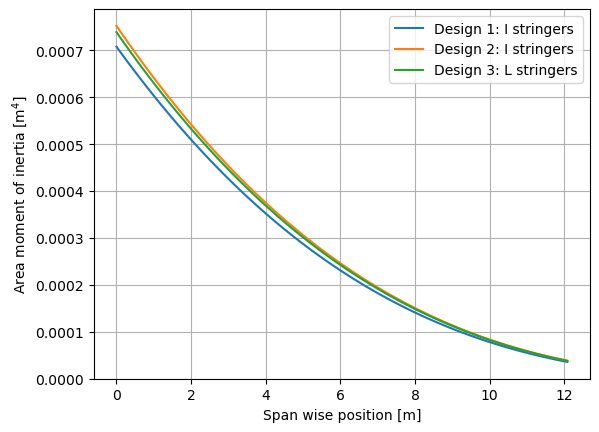

In [17]:
plt.plot(design1['z location [m]'], design1['Area Moment of Inertia [mm^4]'], label='Design 1: I stringers')
plt.plot(design2['z location [m]'], design2['Area Moment of Inertia [mm^4]'], label='Design 2: I stringers')
plt.plot(design3['z location [m]'], design3['Area Moment of Inertia [mm^4]'], label='Design 3: L stringers')
plt.xlabel('Span wise position [m]')
plt.ylabel(r'Area moment of inertia [m$^4$]')
plt.grid()
plt.legend()
#plt.tight_layout()
plt.savefig('Areamomentofinertia.svg')
plt.show()

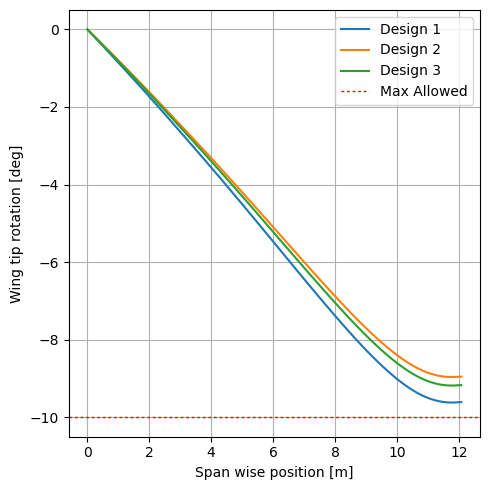

In [18]:
import matplotlib.pyplot as plt
import numpy as np
wingspan_og = 26.9

plt.figure(figsize=(5, 5))
plt.plot(design1['z location [m]'], design1['Rotation [deg]'], label= 'Design 1')
plt.plot(design2['z location [m]'], design2['Rotation [deg]'], label= 'Design 2')
plt.plot(design3['z location [m]'], design3['Rotation [deg]'], label= 'Design 3')
plt.axhline(y = np.sign(design1['Rotation [deg]'].iloc[-1])*10, color = 'r', linestyle = '-', lw= 1, dashes=[2, 2], label='Max Allowed')
plt.xlabel("Span wise position [m]")
plt.ylabel("Wing tip rotation [deg]")
plt.ylim(-10.5, 0.5)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('designs\\g-1rotation.svg')
plt.show()


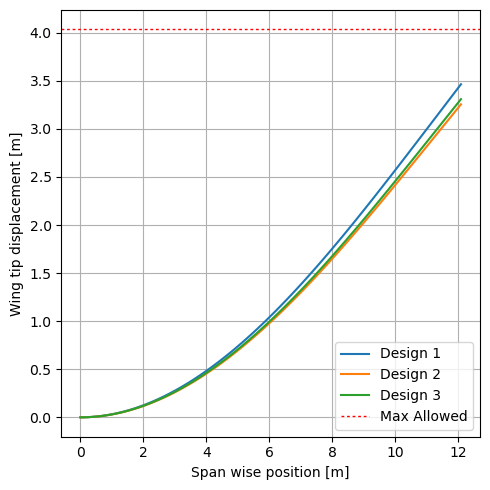

In [19]:
plt.figure(figsize=(5, 5))
plt.plot(design1['z location [m]'], design1['Displacement [m]'], label='Design 1')
plt.plot(design2['z location [m]'], design2['Displacement [m]'], label='Design 2')
plt.plot(design3['z location [m]'], design3['Displacement [m]'], label='Design 3')

plt.axhline(y = np.sign(design1['Displacement [m]'].iloc[-1])*0.15*wingspan_og, color = 'r', linestyle = '-', lw= 1, dashes=[2, 2], label='Max Allowed')

plt.xlabel("Span wise position [m]")
plt.ylabel("Wing tip displacement [m]")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('designs\\g-1displacement.svg')
plt.show()

# Work Package 5

### Finally working on wp5, no need to run the previous cells, start running from here yay!

In [1]:
from scipy.interpolate import interp1d
import numpy as np
import pickle

# Functions for the critical load cases are being called here!!!!!!!
with open("lists.pkl", "rb") as f:
    loaded_lists = pickle.load(f)

z_points = np.linspace(0, 26.9 / 2, 1000)

# Access the lists
g_shear = interp1d(z_points, loaded_lists["list1"], kind='cubic', fill_value="extrapolate")
g_moment = interp1d(z_points, loaded_lists["list2"], kind='cubic', fill_value="extrapolate")
g_torque = interp1d(z_points, loaded_lists["list3"], kind='cubic', fill_value="extrapolate")
g_axial = interp1d(z_points, loaded_lists["list4"], kind='cubic', fill_value="extrapolate")

In [2]:
from wp4_2 import WingBox
from variables import *

t_caps = 0.004
t_spar = 0.008
area_factor = 12
wingbox = WingBox(c_r= c_r, c_t = None, wingspan=b, area_factor_flanges=area_factor, 
                  intersection= intersection, tr= tr, t_spar= t_spar, t_caps= t_spar)

stringers = [20, 1, 'L', {'base': 30e-3, 'height': 30e-3, 'thickness base': 2e-3, 'thickness height': 2e-3}]
 
wingbox.show(wingbox.z, loads= [g_moment, g_torque], moduli= [E, G], stringers= stringers, limits=[0, 10], plot= False, degrees= True, 
             save=False, filename=None)
# if you wanna save the plot just set save=True and put some filename.png i.e. filename= 'thickness2.png'

Wing span modified goes from 0 to 12.08
Max Tip Displacement OK Displacement = 2.390311780777379 8.885917400659402 (% Wingspan)
Wing Tip Max. Rotation Allowed Max displacement = 3.9868935720684218


In [3]:
from wp5_1 import SkinBuckling, Area_crosssection
n_ribs = 8


skin = SkinBuckling(n_ribs=n_ribs, E= E, wingbox_geometry=wingbox.geometry, wingspan=wingbox.wingspan, v= 0.33, M = g_moment, N= g_axial, 
                    I_tot = wingbox.MOM_total, t_caps=t_caps, stringers= stringers, area=Area_crosssection, chord= wingbox.chord, 
                    flange = area_factor, t_spar = t_spar)
skin.applied_stress(z= 1.)

(520808092.8305906,
 array(2973487.56489894),
 (0.38529888820074343,
  0.27689791768029737,
  2.0919485539033458,
  0.02590329581624649),
 0.0010999061796603021)

In [ ]:
from wp5_1 import SparWebBuckling, Area_crosssection
t_front = 4e-3
t_rear = 4e-3
spar = SparWebBuckling(wingbox_geometry=wingbox.geometry, wingspan=wingbox.wingspan, E= E, pois = 0.33, t_front= t_front, t_rear=t_rear, 
                       k_v= 1.5)
spar.margin_of_safety(z=1, V= g_shear, T=g_torque)

# spar.show_mos(V= g_shear, T= g_torque, choice = 'front')

(-0.26981535733315354,
 -0.5089553174884529,
 -262728508.01385838,
 -262728508.01385838)

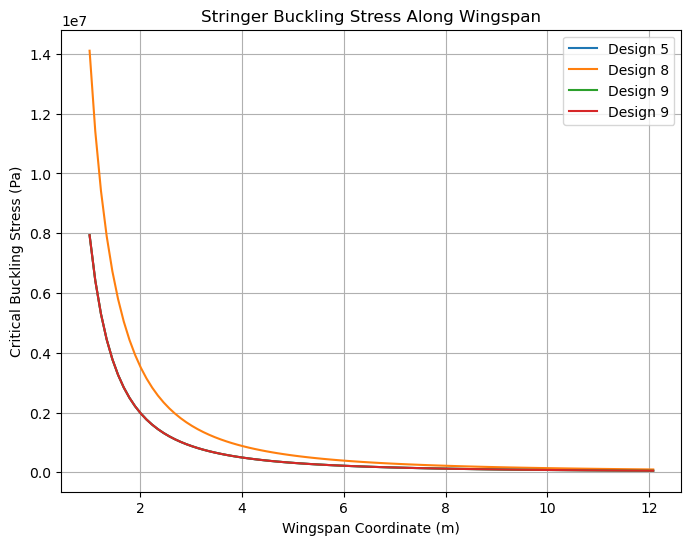

TypeError: Stringer_bucklin.MOS_buckling_values() missing 1 required positional argument: 'applied_stress'

In [ ]:
from wp5_1 import Stringer_bucklin

stringer = Stringer_bucklin(stringers=stringers, wingspan= wingbox.wingspan, chord= wingbox.chord, geometry= wingbox.geometry)

stringer.graph_buckling_values(E=E)
stringer.MOS_buckling_values(E=E, stringers=stringers)